In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit  # import the curve fitting function
%matplotlib inline

## Part A: Eyeball

\begin{table}[]
\centering
\caption{My caption}
\label{my-label}
\begin{tabular}{|l|c|c|c|c|}
Measured Focal Length (mm) & 45 & 97  & 149 & 201 \\
Labeled Focal Length (mm)  & 50 & 100 & 150 & 200
\end{tabular}
\end{table}

## Part B: Parallel Laser Beams

In [132]:
Distance = np.array([5, 7,9, 11, 13, 15, 17])
Separation = np.array([3.8, 4.1, 4.4, 4.7, 5, 5.3, 5.6])
yerr = np.array([0.1]*len(Distance))

(array([ 3.5,  4. ,  4.5,  5. ,  5.5,  6. ]),
 <a list of 6 Text yticklabel objects>)

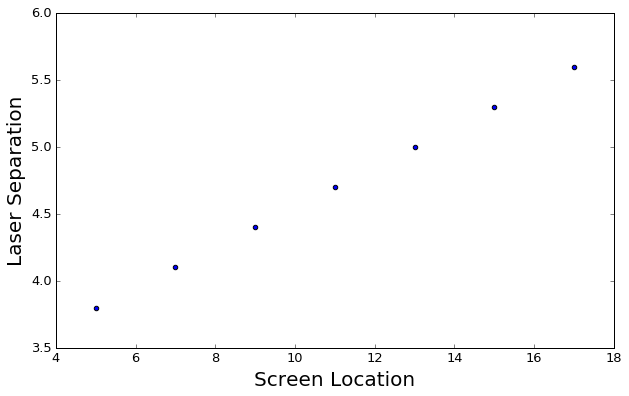

In [133]:
plt.figure(figsize=(10,6));
plt.scatter(Distance,Separation);

plt.xlabel('Screen Location',fontsize=20);
plt.ylabel('Laser Separation',fontsize = 20);
plt.xticks(size = 13);
plt.yticks(size = 13);
#plt.savefig('Sample')

In [134]:
def myfun(D,m,b):
    ans = m*D + b  # this is y, "the function to be fit"
    return ans

In [135]:
p0 = [4,-4]

In [136]:
xlots = np.linspace(-25,20)  # need lots of data points for smooth curve
yfit = np.zeros((len(Separation),xlots.size))

plsq, pcov = curve_fit(myfun, Distance, Separation, p0)  # curve fit returns p and covariance matrix
# these give the parameters and the uncertainties
m = plsq[0]
dm = np.sqrt(pcov[0,0])
b = plsq[1]
db = np.sqrt(pcov[1,1])

yfit = myfun(xlots,plsq[0],plsq[1])  # use fit results for a, b, c
    
print('m = %.2f +/- %.2f' % (plsq[0], np.sqrt(pcov[0,0])))
print('b = %.2f +/- %.2f' % (plsq[1], np.sqrt(pcov[1,1])))

m = 0.15 +/- 0.00
b = 3.05 +/- 0.00


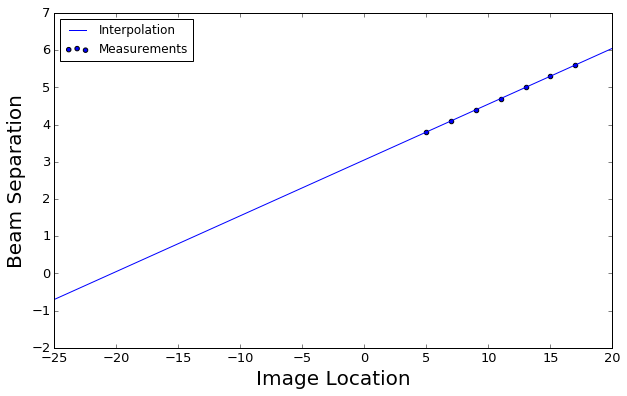

In [137]:
plt.figure(figsize=(10,6));
plt.scatter(Distance,Separation,label='Measurements');
plt.plot(xlots,yfit,label = 'Interpolation');
plt.legend(loc='best');

plt.xlabel('Image Location',fontsize=20);
plt.ylabel('Beam Separation',fontsize = 20);
plt.xticks(size = 13);
plt.yticks(size = 13);
plt.xlim(-25,20);
plt.savefig('PartB')

Separation is zero when 0 = m*D + b. So D = -b/m = -20.33 cm

In [138]:
-b/m

-20.333333333333329

## Part C: Auto-collimation

f = 198 mm

## Part D: Conjugate Points

In [139]:
def focal(L,d):
    # L is object to screen
    # d is separation between lens points
    return (1/(4*L))*(L**2 - d**2)

In [140]:
L = 150.5 - 29.2 #cm
d = 128.1 - 54.6

In [141]:
focal(L,d)

19.190931574608406

## Part E

In [183]:
Origin = 29.2;
Object = np.array([91.8, 57.7, 69.2, 88.8, 54.2, 76.1, 86.4]) - Origin;
Image = np.array([118.4, 122, 106.3, 116.7, 156.2, 107.8, 114.7]) - Object - Origin;

err = 0.05

Objunc = np.array([err/entry**2 for entry in Object]);
Imgunc = np.array([err/entry**2 for entry in Image]);

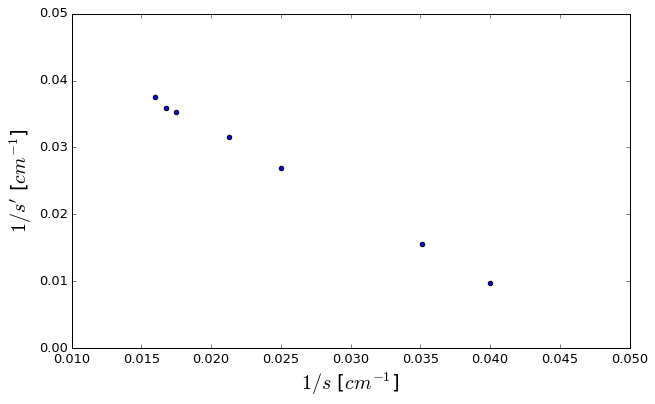

In [174]:
plt.figure(figsize=(10,6));
plt.scatter(np.array([1/entry for entry in Object]) , np.array([1/entry for entry in Image]));

plt.xlabel('$1/s$ [$cm^{-1}$]',fontsize=20);
plt.ylabel('$1/s^{\prime}$ [$cm^{-1}$]',fontsize = 20);
plt.xticks(size = 13);
plt.yticks(size = 13);

In [178]:
def myfun2(sinv,f):
    #sinv = s^-1
    ans = 1/f - sinv  # this is y, "the function to be fit"
    return ans #This should return 1/s'

In [179]:
p02 = 20

In [180]:
xlots2 = np.linspace(0.01,0.05)  # need lots of data points for smooth curve
yfit2 = np.zeros((len(Object),xlots2.size))

plsq, pcov = curve_fit(myfun2, np.array([1/entry for entry in Object]), np.array([1/entry for entry in Image]), p02)  # curve fit returns p and covariance matrix
# these give the parameters and the uncertainties
f = plsq[0]
df = np.sqrt(pcov[0,0])

yfit2 = myfun2(xlots2,plsq[0])  # use fit results for a, b, c
    
print('f = %.2f +/- %.2f' % (plsq[0], np.sqrt(pcov[0,0])))

f = 19.22 +/- 0.19


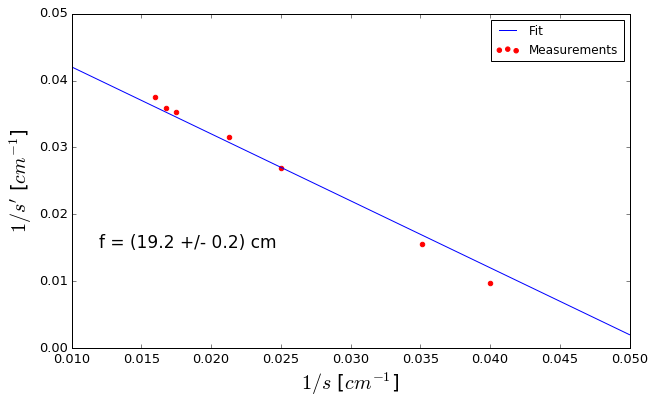

In [191]:
plt.figure(figsize=(10,6));
plt.scatter(np.array([1/entry for entry in Object]) , np.array([1/entry for entry in Image]),label='Measurements',color='red');
#plt.errorbar(np.array([1/entry for entry in Object]) , np.array([1/entry for entry in Image]),xerr = Objunc, yerr = Imgunc, color='red', fmt = 'none');
plt.plot(xlots2,yfit2,label = 'Fit');
plt.legend()

plt.xlabel('$1/s$ [$cm^{-1}$]',fontsize=20);
plt.ylabel('$1/s^{\prime}$ [$cm^{-1}$]',fontsize = 20);
plt.xticks(size = 13);
plt.yticks(size = 13);
plt.xlim(0.01,0.05);
plt.text(0.012,0.015,'f = (%.1f +/- %.1f) cm' % (plsq[0], np.sqrt(pcov[0,0])),size=17);
plt.ylim(0,0.05)
plt.savefig('PartE')